In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [3]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Copy of accurate_augmented_heart_data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
x = df.drop("target", axis=1).values
y = df["target"].values


In [5]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
model = Sequential([
    Dense(512, kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
early_stop = EarlyStopping(patience=15, restore_best_weights=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)


In [10]:
history = model.fit(x_train, y_train, epochs=52, batch_size=32,validation_split=0.2,callbacks=[early_stop, reduce_lr],verbose=1)


Epoch 1/52
224/224 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7307 - loss: 1.2395 - val_accuracy: 0.8241 - val_loss: 1.1090 - learning_rate: 0.0010
Epoch 2/52
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8181 - loss: 1.0646 - val_accuracy: 0.8398 - val_loss: 0.9583 - learning_rate: 0.0010
Epoch 3/52
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8413 - loss: 0.9483 - val_accuracy: 0.8554 - val_loss: 0.8638 - learning_rate: 0.0010
Epoch 4/52
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8409 - loss: 0.8760 - val_accuracy: 0.8487 - val_loss: 0.7885 - learning_rate: 0.0010
Epoch 5/52
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8506 - loss: 0.7731 - val_accuracy: 0.8576 - val_loss: 0.7073 - learning_rate: 0.0010
Epoch 6/52
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8555 - loss: 0.7053 - val_accuracy: 0.8559 - val_loss: 0.6471 - learning_rate: 0.0010
Epoch 7/52
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8488 - loss: 0

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8763 - loss: 0.3335
Test Accuracy: 0.8713


In [12]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.871313672922252
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1056
           1       0.86      0.90      0.88      1182

    accuracy                           0.87      2238
   macro avg       0.87      0.87      0.87      2238
weighted avg       0.87      0.87      0.87      2238



In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', history.history.get('acc'))  # Some versions use 'acc'
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

epochs = range(1, len(loss) + 1)


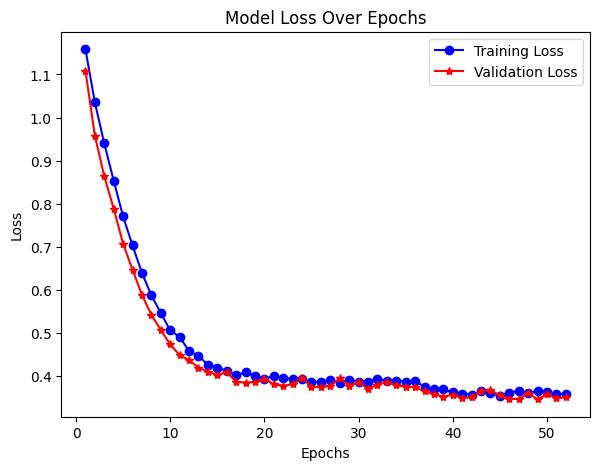

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

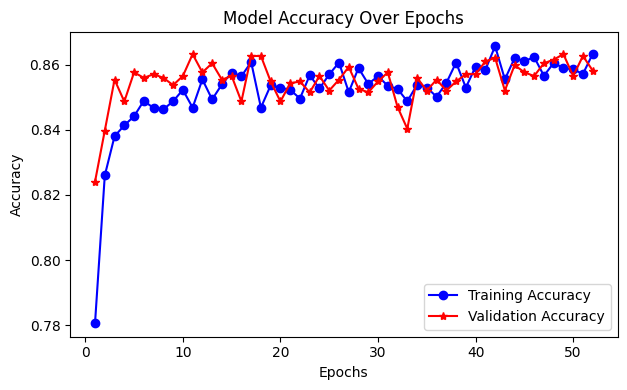

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
import tensorflow as tf
import os
import time
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

def evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics"):
    results = {}

    # Total Parameters
    results['total_parameters'] = model.count_params()

    # FLOPs Calculation
    func = tf.function(lambda x: model(x))
    concrete_func = func.get_concrete_function(
        tf.TensorSpec([1] + list(model.input_shape[1:]), model.inputs[0].dtype)
    )
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    flops = model_analyzer.profile(
        graph=frozen_func.graph,
        options=ProfileOptionBuilder.float_operation()
    ).total_float_ops
    results['FLOPs'] = flops
    results['GFLOPs'] = flops / 1e9

    # Model Size
    model_path = f"{model_name}.h5"
    model.save(model_path)
    size_bytes = os.path.getsize(model_path)
    results['model_size_bytes'] = size_bytes
    results['model_size_MB'] = size_bytes / (1024 * 1024)

    # Inference Time
    start = time.time()
    model.predict(x_test)
    end = time.time()
    results['inference_time_seconds'] = end - start

    # Accuracy
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results['accuracy'] = acc

    return results

evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


{'total_parameters': 185281,
 'FLOPs': 369553,
 'GFLOPs': 0.000369553,
 'model_size_bytes': 2328944,
 'model_size_MB': 2.2210540771484375,
 'inference_time_seconds': 0.45792388916015625,
 'accuracy': 0.8713136911392212}